#### Create taggedDistinct from xml

In [7]:
from xml.etree import ElementTree as ET
import csv
import os

with open('dictionaries/taggedAll_example2.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    
    # for all the xml files in the dir
    path = 'data/example2'
    for filename in os.listdir(path):
        if not filename.endswith('.xml'): continue
        fullname = os.path.join(path, filename)
        
        # open them
        xmldata = open(fullname, encoding='utf-8' ).read()
        
        #parse them
        root = ET.fromstring(xmldata)
        body = root[1][0]
        for l in body:
            
            # for all chilf of l, if they are w
            for w in l:
                if (w.tag == '{http://www.tei-c.org/ns/1.0}w'):
                    
                    wtext = w.text
                    wtype = w.get('type')
                    wlemma = w.get('lemma')
                    wtypelemma = wtype + '_' + wlemma

                    writer.writerow([wtext,wtypelemma])
f.close


# from taggedAll to taggedDistinct                  
reader=csv.reader(open('dictionaries/taggedAll_example2.csv', 'r'), delimiter=',')
with open('dictionaries/taggedDistinct_example2.csv', 'w', newline='') as o:
    writer = csv.writer(o)
    entries = set()
    writer.writerow(['Original', 'Normalised'])
    for row in reader:
        key = (row[0], row[1]) 
        if key not in entries:
            writer.writerow(row)
            entries.add(key)
o.close

print("taggedDistinct created!")



taggedDistinct created!


#### Extract text from XML and create corresponding TXT file

In [29]:
import csv
import os

path = 'data/example2'
for filename in os.listdir(path):
    if not filename.endswith('.xml'): continue
    xmlfile = os.path.join(path, filename)
    
    txtfile = xmlfile.split(".")[0]+".txt"
    
    xmldata = open(xmlfile, encoding='utf-8' ).read()
    
    root = ET.fromstring(xmldata)
    body = root[1][0]
    listw = []
    
    for l in body:
        # for each child of l, if it is w
        for w in l:
            if (w.tag == '{http://www.tei-c.org/ns/1.0}w'):
                wtext = w.text
                listw.append(wtext)
    text = " ".join(listw)
                
    with open (txtfile, 'w') as o:
        o.write(text)



### Collation, using automatic dictionary

taggedAll and taggedDistinct created in folder Dictionaries/ !


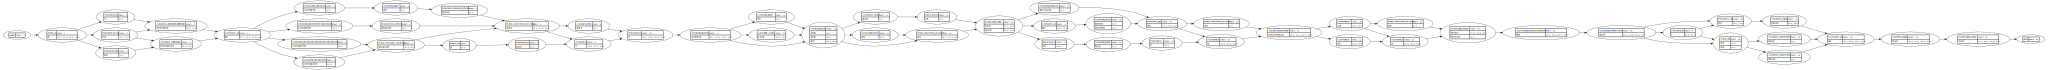

external table created!


In [36]:
from collatex import *
collation = Collation()
import csv, re
from general_functions import tag_poslemma
from general_functions import table_automaticDictionary


tag_poslemma('example2')  # ex: create_poslemma('example2')
print("taggedAll and taggedDistinct created in folder Dictionaries/ !")


A = open( "data/example2/A.txt", encoding='utf-8' ).read()
F = open( "data/example2/F.txt", encoding='utf-8' ).read()
G = open( "data/example2/G.txt", encoding='utf-8' ).read()
H = open( "data/example2/H.txt", encoding='utf-8' ).read()

#create the dictionary consisting of two columns, separated by a comma.
# The first Column 'Original' are the strings as found in the text, 
# the second column 'Normalised' contains the strings you want to replace them with. 
# No whitespaces behind the strings.
Normit = {}
with open('dictionaries/taggedDistinct_example2.csv') as csvfile:
    reader = csv.DictReader(csvfile, fieldnames=['Original', 'Normalised'])
    for row in reader:
        Normit[row['Original']]= row['Normalised']

#read in the witnesses  from your file system 
from collatex.core_classes import WordPunctuationTokenizer
tokenizer = WordPunctuationTokenizer()

# build a function to tokenize and to normalize by replace keys to be 
# found in the dictionary by the corresponding values 
def tokennormalizer(witness) :
    tokens_as_strings = tokenizer.tokenize(witness)
    list = []
    for token_string in tokens_as_strings:
        normversion = re.sub(r'\s+$',"", token_string)
        replaceversion = Normit.get(normversion,normversion)
        list.append({'t':token_string, 'n':replaceversion})
    return(list)

#collate
tokens_A = tokennormalizer(A) 
tokens_F = tokennormalizer(F) 
tokens_G = tokennormalizer(G) 
tokens_H = tokennormalizer(H) 

witness_A = { "id": "W1", "tokens":tokens_A }
witness_F = { "id": "W2", "tokens":tokens_F }
witness_G = { "id": "W3", "tokens":tokens_G }
witness_H = { "id": "W4", "tokens":tokens_H }


input = { "witnesses": [ witness_A, witness_F, witness_G, witness_H ] }


table = collate(input, output='html2', segmentation=False)
graphSvg = collate(input, output='svg', segmentation=False)

graph_automaticDictionary = collate(input, output='json', segmentation=False)
table_automaticDictionary(graph_automaticDictionary, 'example2')
print('external table created!')

taggedAll and taggedDistinct created in folder Dictionaries/ !


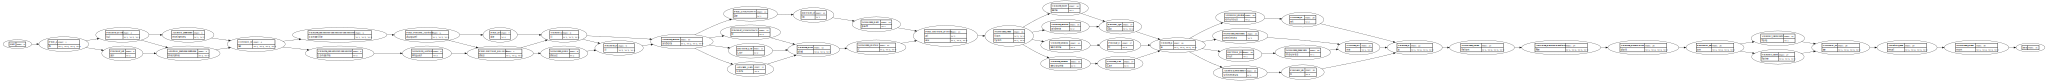

external table created!


In [34]:
from collatex import *
collation = Collation()
import csv, re
from general_functions import tag_poslemma
from general_functions import table_automaticDictionary


tag_poslemma('example2')  # ex: create_poslemma('example2')
print("taggedAll and taggedDistinct created in folder Dictionaries/ !")

M = open( "data/example2/M.txt", encoding='utf-8' ).read()
P = open( "data/example2/P.txt", encoding='utf-8' ).read()
R = open( "data/example2/R.txt", encoding='utf-8' ).read()
S = open( "data/example2/S.txt", encoding='utf-8' ).read()


#create the dictionary consisting of two columns, separated by a comma.
# The first Column 'Original' are the strings as found in the text, 
# the second column 'Normalised' contains the strings you want to replace them with. 
# No whitespaces behind the strings.
Normit = {}
with open('dictionaries/taggedDistinct_example2.csv') as csvfile:
    reader = csv.DictReader(csvfile, fieldnames=['Original', 'Normalised'])
    for row in reader:
        Normit[row['Original']]= row['Normalised']

#read in the witnesses  from your file system 
from collatex.core_classes import WordPunctuationTokenizer
tokenizer = WordPunctuationTokenizer()

# build a function to tokenize and to normalize by replace keys to be 
# found in the dictionary by the corresponding values 
def tokennormalizer(witness) :
    tokens_as_strings = tokenizer.tokenize(witness)
    list = []
    for token_string in tokens_as_strings:
        normversion = re.sub(r'\s+$',"", token_string)
        replaceversion = Normit.get(normversion,normversion)
        list.append({'t':token_string, 'n':replaceversion})
    return(list)

#collate
tokens_M = tokennormalizer(M) 
tokens_P = tokennormalizer(P) 
tokens_R = tokennormalizer(R) 
tokens_S = tokennormalizer(S) 

witness_M = { "id": "W1", "tokens":tokens_M }
witness_P = { "id": "W2", "tokens":tokens_P }
witness_R = { "id": "W3", "tokens":tokens_R }
witness_S = { "id": "W4", "tokens":tokens_S }


input = { "witnesses": [ witness_M, witness_P, witness_R, witness_S ] }



table = collate(input, output='html2', segmentation=False)
graphSvg = collate(input, output='svg', segmentation=False)

graph_automaticDictionary = collate(input, output='json', segmentation=False)
table_automaticDictionary(graph_automaticDictionary, 'example2')
print('external table created!')

In [35]:
from collatex import *
collation = Collation()
import csv, re
from general_functions import tag_poslemma
from general_functions import table_automaticDictionary


tag_poslemma('example2')  # ex: create_poslemma('example2')
print("taggedAll and taggedDistinct created in folder Dictionaries/ !")


A = open( "data/example2/A.txt", encoding='utf-8' ).read()
F = open( "data/example2/F.txt", encoding='utf-8' ).read()
G = open( "data/example2/G.txt", encoding='utf-8' ).read()
H = open( "data/example2/H.txt", encoding='utf-8' ).read()
M = open( "data/example2/M.txt", encoding='utf-8' ).read()
P = open( "data/example2/P.txt", encoding='utf-8' ).read()
R = open( "data/example2/R.txt", encoding='utf-8' ).read()
S = open( "data/example2/S.txt", encoding='utf-8' ).read()
V = open( "data/example2/V.txt", encoding='utf-8' ).read()


#create the dictionary consisting of two columns, separated by a comma.
# The first Column 'Original' are the strings as found in the text, 
# the second column 'Normalised' contains the strings you want to replace them with. 
# No whitespaces behind the strings.
Normit = {}
with open('dictionaries/taggedDistinct_example2.csv') as csvfile:
    reader = csv.DictReader(csvfile, fieldnames=['Original', 'Normalised'])
    for row in reader:
        Normit[row['Original']]= row['Normalised']

#read in the witnesses  from your file system 
from collatex.core_classes import WordPunctuationTokenizer
tokenizer = WordPunctuationTokenizer()

# build a function to tokenize and to normalize by replace keys to be 
# found in the dictionary by the corresponding values 
def tokennormalizer(witness) :
    tokens_as_strings = tokenizer.tokenize(witness)
    list = []
    for token_string in tokens_as_strings:
        normversion = re.sub(r'\s+$',"", token_string)
        replaceversion = Normit.get(normversion,normversion)
        list.append({'t':token_string, 'n':replaceversion})
    return(list)

tokens_A = tokennormalizer(A) 
tokens_F = tokennormalizer(F) 
tokens_G = tokennormalizer(G) 
tokens_H = tokennormalizer(H) 
tokens_M = tokennormalizer(M) 
tokens_P = tokennormalizer(P) 
tokens_R = tokennormalizer(R) 
tokens_S = tokennormalizer(S) 
tokens_V = tokennormalizer(V) 

witness_A = { "id": "W1", "tokens":tokens_A }
witness_F = { "id": "W2", "tokens":tokens_F }
witness_G = { "id": "W3", "tokens":tokens_G }
witness_H = { "id": "W4", "tokens":tokens_H }
witness_M = { "id": "W1", "tokens":tokens_M }
witness_P = { "id": "W2", "tokens":tokens_P }
witness_R = { "id": "W3", "tokens":tokens_R }
witness_S = { "id": "W4", "tokens":tokens_S }
witness_V = { "id": "W1", "tokens":tokens_V }


input = { "witnesses": [ witness_A, witness_F, witness_G, witness_H, witness_M, witness_P, witness_R, witness_S, witness_V ] }



table = collate(input, output='html2', segmentation=False)
graphSvg = collate(input, output='svg', segmentation=False)

graph_automaticDictionary = collate(input, output='json', segmentation=False)
table_automaticDictionary(graph_automaticDictionary, 'example2')
print('external table created!')

taggedAll and taggedDistinct created in folder Dictionaries/ !


KeyError: 244